In [17]:
import os
from pathlib import Path
import pandas as pd
# 当前脚本文件路径
current_file_path = Path.cwd()
# 上一级文件夹路径
parent_folder_path = current_file_path.parent
#学校集群
Data_PATH = parent_folder_path / "ML_datasets"
print(Data_PATH)
def load_data(csv_name):
    csv_path = os.path.join(Data_PATH, csv_name)
    return pd.read_csv(csv_path)

/public/home/zss/ML_datasets


In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
# from tensorflow import keras
import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-01-13 13:43:59.330842: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-13 13:43:59.332450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 13:43:59.339571: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 13:43:59.362101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736747039.398604  206839 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736747039.40

# 11.1.1 Glorot和He初始化

In [5]:
keras.layers.Dense(10, activation='relu',kernel_initializer="he_normal")

<Dense name=dense, built=False>

In [6]:
init = keras.initializers.VarianceScaling(scale=2.,mode= 'fan_avg',distribution='uniform')
keras.layers.Dense(10, activation='relu',kernel_initializer=init)

<Dense name=dense_1, built=False>

# 11.1.2 非饱和激活函数

测试Leaky ReLU:

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-13 13:44:31.889048: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4734 - loss: 1.6537 - val_accuracy: 0.7156 - val_loss: 0.8612
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7253 - loss: 0.8196 - val_accuracy: 0.7694 - val_loss: 0.6961
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7693 - loss: 0.6855 - val_accuracy: 0.7936 - val_loss: 0.6253
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7899 - loss: 0.6207 - val_accuracy: 0.8058 - val_loss: 0.5822
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8037 - loss: 0.5800 - val_accuracy: 0.8168 - val_loss: 0.5528
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8126 - loss: 0.5516 - val_accuracy: 0.8240 - val_loss: 0.5311
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8195 - loss: 0.5304 - val_accuracy: 0.8282 - val_loss: 0.5143
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8251 - loss: 0

In [10]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.608673,1.277811,0.7156,0.861154
1,0.739655,0.776384,0.7694,0.696122
2,0.777036,0.667824,0.7936,0.625313
3,0.795200,0.611040,0.8058,0.582240
4,0.807309,0.574367,0.8168,0.552764
5,0.815491,0.548344,0.8240,0.531061
6,0.821400,0.528668,0.8282,0.514294
7,0.826109,0.513190,0.8304,0.500903
8,0.829545,0.500547,0.8336,0.489823
9,0.832636,0.489936,0.8358,0.480523


Saving figure keras_learning_curves_plot


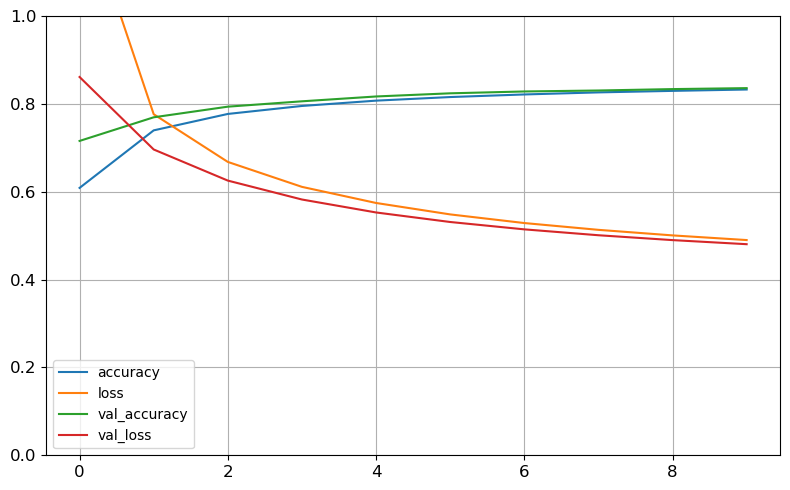

In [9]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

测试PReLU:

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10,validation_data=(X_valid, y_valid))

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4691 - loss: 1.6558 - val_accuracy: 0.7182 - val_loss: 0.8778
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7299 - loss: 0.8371 - val_accuracy: 0.7706 - val_loss: 0.6991
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7735 - loss: 0.6948 - val_accuracy: 0.7960 - val_loss: 0.6239
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7955 - loss: 0.6269 - val_accuracy: 0.8116 - val_loss: 0.5788
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8076 - loss: 0.5843 - val_accuracy: 0.8184 - val_loss: 0.5481
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8155 - loss: 0.5548 - val_accuracy: 0.8262 - val_loss: 0.5258
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8213 - loss: 0.5328 - val_accuracy: 0.8332 - val_loss: 0.5084
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8257 - loss: 0

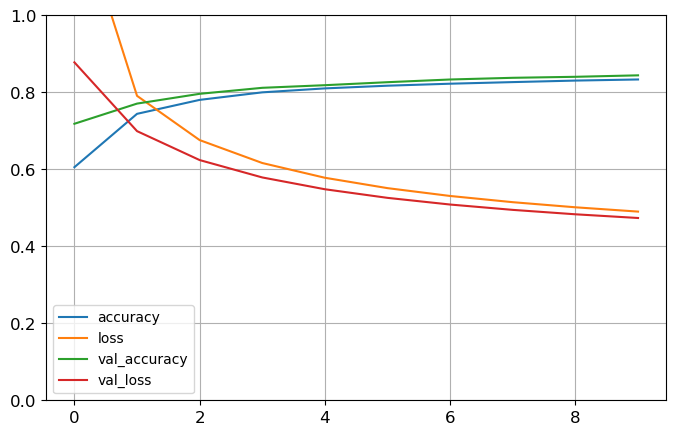

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [14]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.3978 - loss: 1.5476 - val_accuracy: 0.7354 - val_loss: 0.7640
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.7209 - loss: 0.7743 - val_accuracy: 0.7660 - val_loss: 0.6691
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.7768 - loss: 0.6266 - val_accuracy: 0.8052 - val_loss: 0.5597
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.8009 - loss: 0.5728 - val_accuracy: 0.8142 - val_loss: 0.5348
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.8235 - loss: 0.5107 - val_accuracy: 0.8098 - val_loss: 0.5242


Now look at what happens if we try to use the ReLU activation function

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.1652 - loss: 2.1313 - val_accuracy: 0.4846 - val_loss: 1.2401
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.4387 - loss: 1.3250 - val_accuracy: 0.5902 - val_loss: 1.0257
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.6141 - loss: 0.9187 - val_accuracy: 0.6246 - val_loss: 0.9115
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.5851 - loss: 1.0118 - val_accuracy: 0.6252 - val_loss: 0.8966
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.6274 - loss: 0.9164 - val_accuracy: 0.5702 - val_loss: 1.0052


# 11.1.3 批量归一化

In [4]:
model  = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),  # 显式定义输入层
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax"),
])

In [5]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"]
              )

In [11]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6067 - loss: 1.1927 - val_accuracy: 0.8100 - val_loss: 0.5745
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7958 - loss: 0.6005 - val_accuracy: 0.8410 - val_loss: 0.4922
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8160 - loss: 0.5314 - val_accuracy: 0.8510 - val_loss: 0.4516
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8291 - loss: 0.4857 - val_accuracy: 0.8566 - val_loss: 0.4289
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8418 - loss: 0.4550 - val_accuracy: 0.8584 - val_loss: 0.4154
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8465 - loss: 0.4358 - val_accuracy: 0.8626 - val_loss: 0.4035
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8476 - loss: 0.4331 - val_accuracy: 0.8674 - val_loss: 0.3934
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8541 - loss: 0.4143 -

要在激活函数之前添加BN层，必须从隐藏层中删除激活函数，并将
其作为单独的层添加到BN层之后。此外，由于批量归一化层的每个输入
都包含一个偏移参数，因此你可以从上一层中删除偏置项（创建时只需
传递use_bias=False即可）：

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),  # 显式定义输入层
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5351 - loss: 1.4808 - val_accuracy: 0.7778 - val_loss: 0.7028
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7686 - loss: 0.7255 - val_accuracy: 0.8146 - val_loss: 0.5712
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7942 - loss: 0.6188 - val_accuracy: 0.8290 - val_loss: 0.5114
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8121 - loss: 0.5651 - val_accuracy: 0.8414 - val_loss: 0.4739
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8204 - loss: 0.5298 - val_accuracy: 0.8498 - val_loss: 0.4487
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8271 - loss: 0.5049 - val_accuracy: 0.8548 - val_loss: 0.4315
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8326 - loss: 0.4850 - val_accuracy: 0.8602 - val_loss: 0.4175
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8434 - loss: 0

# 11.3 更快的优化器

## Momentum optimization
## 11.3.1 动量优化

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Nesterov Accelerated Gradient
## 11.3.2 Nesterov加速梯度
动量优化的一个小变体几乎总
是比原始动量优化要快

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## 11.3.3 AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## 11.3.4 RMSProp

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## 11.3.5 Adam Optimization

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# 11.3.6 学习率调度

在Keras中实现幂调度是最简单的选择：只需在创建优化器时设置
超参数decay即可：

In [10]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [14]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7945 - loss: 0.5883 - val_accuracy: 0.8574 - val_loss: 0.4100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8624 - loss: 0.3860 - val_accuracy: 0.8680 - val_loss: 0.3800
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8777 - loss: 0.3430 - val_accuracy: 0.8730 - val_loss: 0.3661
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8870 - loss: 0.3115 - val_accuracy: 0.8714 - val_loss: 0.3616
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8924 - loss: 0.2974 - val_accuracy: 0.8772 - val_loss: 0.3562
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8988 - loss: 0.2815 - val_accuracy: 0.8812 - val_loss: 0.3387
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9019 - loss: 0.2738 - val_accuracy: 0.8786 - val_loss: 0.3410
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9057 - loss: 0

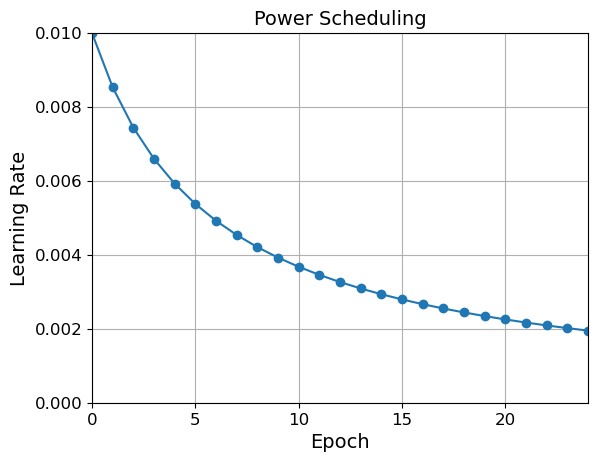

In [15]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

指数调度

In [16]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [17]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


放回调里

In [19]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7552 - loss: 1.0138 - val_accuracy: 0.7962 - val_loss: 0.6439 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7997 - loss: 0.6510 - val_accuracy: 0.7676 - val_loss: 0.7771 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8173 - loss: 0.5919 - val_accuracy: 0.8416 - val_loss: 0.6202 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8400 - loss: 0.5090 - val_accuracy: 0.8452 - val_loss: 0.6071 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8456 - loss: 0.4988 - val_accuracy: 0.8472 - val_loss: 0.6379 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8509 - loss: 0.4677 - val_accuracy: 0.8400 - val_loss: 0.5507 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8

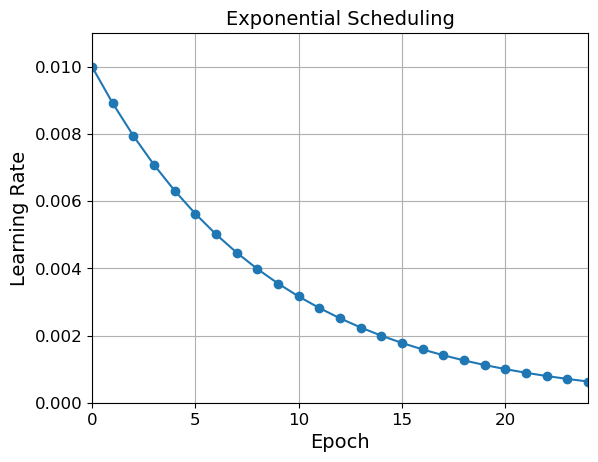

In [30]:
plt.plot(history.epoch, history.history["learning_rate"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

LearningRateScheduler将在每个轮次开始时更新优化器的
learning_rate属性。通常每个轮次更新一次学习率就足够了，但是如
果你希望更频繁地更新学习率（例如在每个步骤中），则可以编写自己
的回调函数（请参阅notebook的“Exponential Scheduling”部分示
例）

分段恒定调度

In [31]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [32]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [33]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7582 - loss: 0.9589 - val_accuracy: 0.7908 - val_loss: 0.6974 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7782 - loss: 0.7340 - val_accuracy: 0.7654 - val_loss: 0.8099 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7879 - loss: 0.7287 - val_accuracy: 0.7380 - val_loss: 1.0899 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7667 - loss: 0.8092 - val_accuracy: 0.6654 - val_loss: 1.3326 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7719 - loss: 0.7951 - val_accuracy: 0.8026 - val_loss: 0.8587 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8229 - loss: 0.5814 - val_accuracy: 0.8468 - val_loss: 0.6091 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8

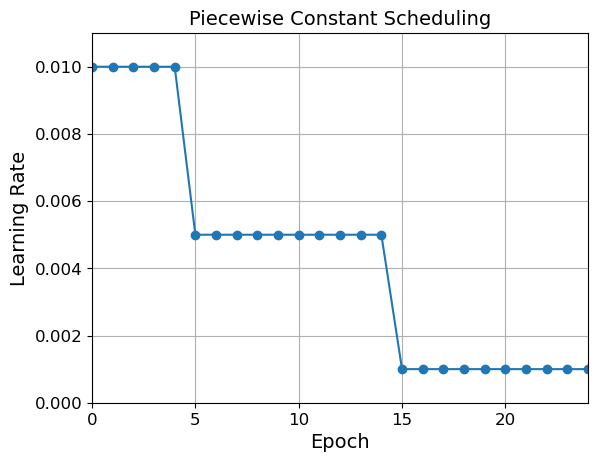

In [35]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [36]:
tf.random.set_seed(42)
np.random.seed(42)

In [37]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7738 - loss: 0.7116 - val_accuracy: 0.8436 - val_loss: 0.5315 - learning_rate: 0.0200
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8349 - loss: 0.5148 - val_accuracy: 0.8356 - val_loss: 0.6225 - learning_rate: 0.0200
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8399 - loss: 0.5305 - val_accuracy: 0.8340 - val_loss: 0.7021 - learning_rate: 0.0200
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8440 - loss: 0.5329 - val_accuracy: 0.8524 - val_loss: 0.6345 - learning_rate: 0.0200
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8513 - loss: 0.5156 - val_accuracy: 0.8450 - val_loss: 0.7336 - learning_rate: 0.0200
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8480 - loss: 0.5477 - val_accuracy: 0.8426 - val_loss: 0.7237 - learning_rate: 0.0200
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8

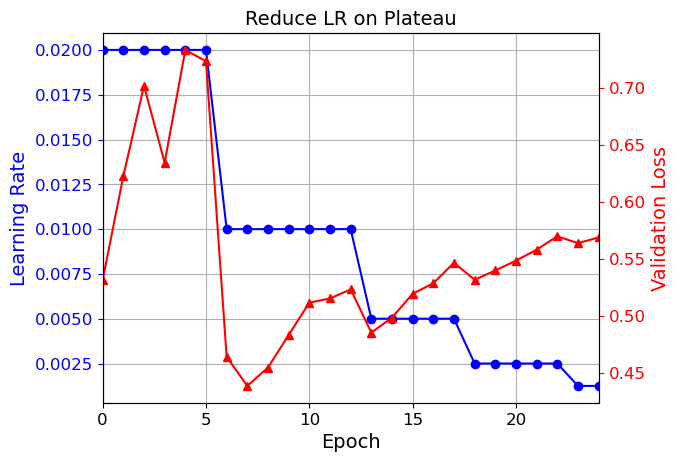

In [39]:
plt.plot(history.epoch, history.history["learning_rate"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7907 - loss: 0.5993 - val_accuracy: 0.8604 - val_loss: 0.4018
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8642 - loss: 0.3870 - val_accuracy: 0.8672 - val_loss: 0.3727
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8771 - loss: 0.3511 - val_accuracy: 0.8716 - val_loss: 0.3583
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8842 - loss: 0.3287 - val_accuracy: 0.8768 - val_loss: 0.3493
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8903 - loss: 0.3121 - val_accuracy: 0.8772 - val_loss: 0.3431
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8946 - loss: 0.2989 - val_accuracy: 0.8788 - val_loss: 0.3382
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8987 - loss: 0.2879 - val_accuracy: 0.8812 - val_loss: 0.3345
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9026 - loss: 0

# 11.4 通过正则化避免过拟合

## $\ell_1$ and $\ell_2$ regularization

In [43]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

每次要写这个参数

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7950 - loss: 3.1561 - val_accuracy: 0.8376 - val_loss: 0.7048
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8223 - loss: 0.7286 - val_accuracy: 0.8434 - val_loss: 0.6819


把相同的参数进行封装

In [45]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7972 - loss: 3.2857 - val_accuracy: 0.8372 - val_loss: 0.7115
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8224 - loss: 0.7301 - val_accuracy: 0.8438 - val_loss: 0.6886


# 11.4.2 dropout

In [47]:
model  = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),  # 显式定义输入层
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

n_epochs = 10

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7593 - loss: 0.7374 - val_accuracy: 0.8716 - val_loss: 0.3645
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8408 - loss: 0.4318 - val_accuracy: 0.8758 - val_loss: 0.3429
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8550 - loss: 0.3959 - val_accuracy: 0.8812 - val_loss: 0.3264
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8607 - loss: 0.3754 - val_accuracy: 0.8850 - val_loss: 0.3192
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8655 - loss: 0.3632 - val_accuracy: 0.8800 - val_loss: 0.3271
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8687 - loss: 0.3587 - val_accuracy: 0.8760 - val_loss: 0.3332
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8734 - loss: 0.3407 - val_accuracy: 0.8856 - val_loss: 0.3098
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8738 - loss: 0

## Alpha dropout

In [48]:
tf.random.set_seed(42)
np.random.seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7114 - loss: 0.8114 - val_accuracy: 0.8446 - val_loss: 0.5643
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7916 - loss: 0.5642 - val_accuracy: 0.8488 - val_loss: 0.5281
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8028 - loss: 0.5337 - val_accuracy: 0.8562 - val_loss: 0.5148
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8084 - loss: 0.5156 - val_accuracy: 0.8638 - val_loss: 0.4684
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8143 - loss: 0.5001 - val_accuracy: 0.8646 - val_loss: 0.4500
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8187 - loss: 0.4839 - val_accuracy: 0.8630 - val_loss: 0.4595
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8264 - loss: 0.4714 - val_accuracy: 0.8640 - val_loss: 0.4531
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8254 - loss: 0

In [50]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8639 - loss: 0.4760


[0.4791966676712036, 0.8626999855041504]

In [51]:
model.evaluate(X_train_scaled, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8799 - loss: 0.3524


[0.355573445558548, 0.8820000290870667]

In [52]:
history = model.fit(X_train_scaled, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8458 - loss: 0.4144


## MC Dropout

In [53]:
tf.random.set_seed(42)
np.random.seed(42)

In [58]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [59]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [57]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.18, 0.  , 0.8 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.09, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.06, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.15, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.01, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.44, 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0

In [60]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.14, 0.  , 0.82]],
      dtype=float32)

In [61]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.17, 0.  , 0.21]],
      dtype=float32)

In [62]:
y_pred = np.argmax(y_proba, axis=1)

In [63]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

np.float64(0.8678)

In [64]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [65]:
tf.random.set_seed(42)
np.random.seed(42)

In [66]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [67]:
mc_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout                │ (None, 784)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout_1              │ (None, 300)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_alpha_dropout_2              │ (None, 100)            │             0 │
│ (MCAlphaDropout)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [69]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [70]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.18, 0.  , 0.78]],
      dtype=float32)

In [1]:
import numpy as np

# 输入层和隐藏层节点数
n_in = 3  # 输入层有 3 个节点
n_out = 5  # 隐藏层有 5 个节点

# Xavier 初始化权重矩阵，方差为 2 / (n_in + n_out)
W = np.random.randn(n_out, n_in) * np.sqrt(2 / (n_in + n_out))

# 偏置初始化为 0
b = np.zeros((n_out, 1))

print("权重矩阵 W: \n", W)
print("偏置向量 b: \n", b)


权重矩阵 W: 
 [[-0.54122417  0.33241846  0.59894835]
 [ 0.52150273 -0.30689533  0.13483908]
 [ 0.83390766 -0.85592776 -0.34440274]
 [ 1.07887283 -0.34731675  0.55346599]
 [-0.3824956   0.27429582  0.84521071]]
偏置向量 b: 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


8.练习
a.构建一个DNN，其中包含20个隐藏的层，每个层包含100个神经
元（这太多了，但这是本练习的重点）。使用He初始化和ELU激活函
数。

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

   278528/170498071 ━━━━━━━━━━━━━━━━━━━━ 10:35:02 224us/step

KeyboardInterrupt: 

In [36]:
#手动加载数据集

import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

def load_cifar10_batch(batch_path):
    """加载一个CIFAR-10批次文件"""
    with open(batch_path, 'rb') as f:
        # 加载批次数据
        batch = pickle.load(f, encoding='bytes')
    data = batch[b'data']
    labels = batch[b'labels']
    data = data.reshape((data.shape[0], 3, 32, 32))  # 变成 (num_images, 3, 32, 32) 格式
    data = data.transpose(0, 2, 3, 1)  # 变成 (num_images, 32, 32, 3) 格式
    return data, labels

def load_cifar10_data(data_dir):
    """加载整个CIFAR-10数据集"""
    # 训练集数据
    train_data = []
    train_labels = []
    for i in range(1, 6):
        batch_path = os.path.join(data_dir, f"data_batch_{i}")
        data, labels = load_cifar10_batch(batch_path)
        train_data.append(data)
        train_labels.append(labels)

    # 合并训练数据
    X_train = np.concatenate(train_data, axis=0)
    y_train = np.concatenate(train_labels, axis=0)

    # 测试集数据
    test_data, test_labels = load_cifar10_batch(os.path.join(data_dir, "test_batch"))

    return (X_train, y_train), (test_data, test_labels)

# 设置数据集路径
data_dir = Data_PATH / "cifar-10-batches-py"

# 加载数据
(X_train_full, y_train_full), (X_test, y_test) = load_cifar10_data(data_dir)

# 打印数据集的形状
print(f"Training data shape: {X_train_full.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [37]:
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [38]:
X_train.shape

(45000, 32, 32, 3)

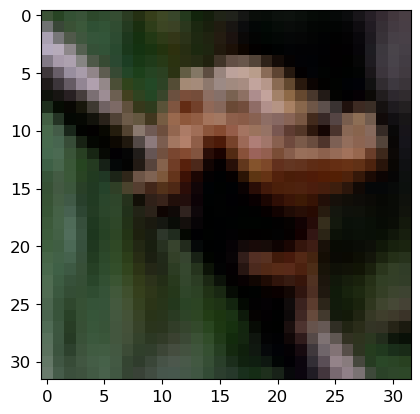

In [39]:
# 可视化其中一张图片
plt.imshow(X_train[0])
plt.show()

CIFAR-10 数据集有 10 个类别，它们的标签（从 0 到 9）分别代表以下类别：

0: 飞机
1: 汽车
2: 鸟
3: 猫
4: 鹿
5: 狗
6: 青蛙
7: 马
8: 船
9: 卡车

In [56]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


b.使用Nadam优化和提前停止，在CIFAR10数据集上训练网络。你
可以使用keras.datasets.cifar10.load_data（）加载它。该数据集
由10个类别的60 000个32×32像素的彩色图像（50 000个用于训练，
10 000个用于测试）组成，因此你需要一个具有10个神经元的softmax
输出层。记住，每次更改模型的架构或超参数时，都要寻找正确的学
习率。

In [58]:
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [59]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.keras", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(Data_PATH, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.1434 - loss: 10.9529 - val_accuracy: 0.2428 - val_loss: 2.0751
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.2416 - loss: 2.0668 - val_accuracy: 0.2902 - val_loss: 1.9312
Epoch 3/100
 679/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2731 - loss: 1.9681 

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
model = keras.models.load_model("my_cifar10_model.keras")
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4372 - loss: 1.5577


[1.575222373008728, 0.4374000132083893]

c.现在尝试添加批量归一化并比较学习曲线：收敛速度是否比以
前快？会产生更好的模型吗？它如何影响训练速度？

In [53]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.keras", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

/public/home/zss/softpath/Anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.3009 - loss: 1.9727 - val_accuracy: 0.4162 - val_loss: 1.6559
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3988 - loss: 1.6852 - val_accuracy: 0.4348 - val_loss: 1.5765
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.4362 - loss: 1.5881 - val_accuracy: 0.4314 - val_loss: 1.5716
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.4631 - loss: 1.5165 - val_accuracy: 0.4380 - val_loss: 1.5604
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.4839 - loss: 1.4545 - val_accuracy: 0.4494 - val_loss: 1.5511
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.5055 - loss: 1.4024 - val_accuracy: 0.4610 - val_loss: 1.5358
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.5264 - loss: 1.3471 - val_accuracy: 0.4616 - val_loss: 1.5508
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 

[1.535797119140625, 0.460999995470047]

In [62]:
model = keras.models.load_model("my_cifar10_bn_model.keras")
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4596 - loss: 1.5454


[1.535797119140625, 0.460999995470047]

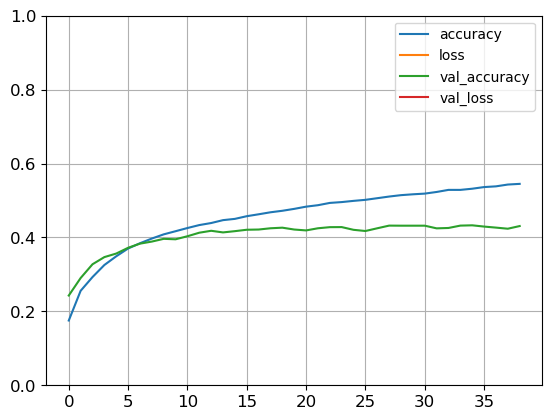

In [63]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

d.尝试用SELU替换批量归一化，并进行必要的调整以确保网络是
自归一化的（即归一化输入特征，使用LeCun正态初始化，确保DNN仅
仅包含一系列的密集层等）。

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.keras", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history = model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.keras")
model.evaluate(X_valid_scaled, y_valid)

In [61]:
model = keras.models.load_model("my_cifar10_selu_model.keras")
model.evaluate(X_valid_scaled, y_valid)

ValueError: File not found: filepath=my_cifar10_selu_model.keras. Please ensure the file is an accessible `.keras` zip file.

e.尝试使用Alpha Dropout正则化模型。然后，在不重新训练模型
的情况下，看看是否可以使用MC Dropout获得更好的准确率。

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.keras")
model.evaluate(X_valid_scaled, y_valid)

In [ ]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

f.使用1周期调度来重新训练模型，看看它是否可以提高训练速度
和模型准确率。

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])